# Course work

Task: Marketing campaigns are essential part of business. This is also true for banking services. Meanwhile estimation of marketing campaign preformance and prediction of performance is a challanging task. Based on historical data related to direct marketing campaigns of a Portuguese banking institution try to predict subscription for deposit during new marketing campaign.

Metrics:
As for subscription prediction we can't prefer precision either recall will use f1-score metric
*   f1-score maximization
*   f1-score >= 80%


Dataset for research available [here](https://archive.ics.uci.edu/dataset/222/bank+marketing)

In [6]:
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib
plt = matplotlib.pyplot

print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"missingno: {msno.__version__}")
print(f"numpy: {np.__version__}")

pandas: 1.5.3
seaborn: 0.12.2
missingno: 0.5.2
numpy: 1.22.4


In [3]:
url = 'https://raw.githubusercontent.com/dmytrovelychko/rd_ds_python/main/datasets/bank-full.csv'
df = pd.read_csv(url, sep=";")
print(f"shape: {df.shape}")
df[:100]

shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Numerical features


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Notes:
- age, looks good            
- balance, looks good
- pdays, looks good, value -1 means not contacted
- previous, looks good     

Will not use data about contacs during current campaign, as need to perform prediciton before campaing starts:
- campaign, drop
- duration, drop (remove from prediction model as after call y is obiviously known)
- day, drop
- month, drop

In [14]:
df = df.drop(columns=["campaign", "duration", "day", "month"])

<ipython-input-22-2d299eb40d82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-22-2d299eb40d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");


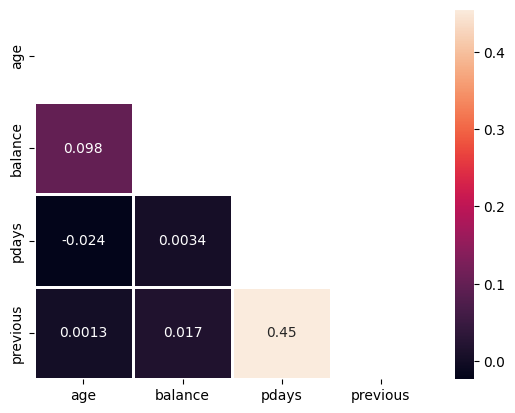

In [22]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

there is notable correlation between **pdays**: number of days that passed by after the client was last contacted from a previous
and **previous**: number of contacts performed before this campaign and for this client

age            Axes(0.125,0.11;0.168478x0.77)
balance     Axes(0.327174,0.11;0.168478x0.77)
pdays       Axes(0.529348,0.11;0.168478x0.77)
previous    Axes(0.731522,0.11;0.168478x0.77)
dtype: object

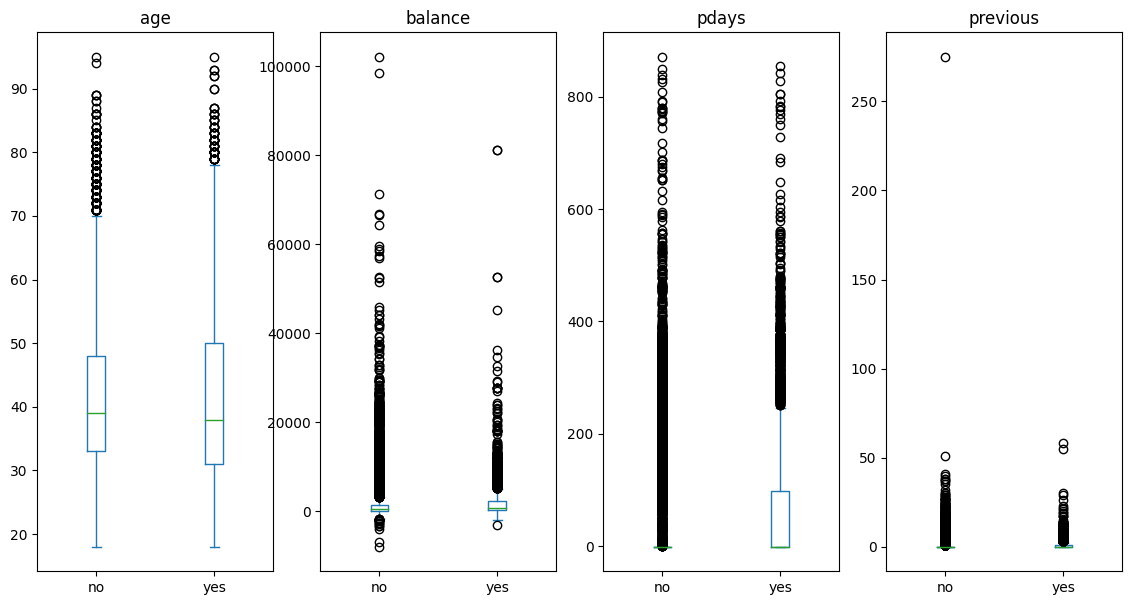

In [31]:
df.plot.box(by="y", figsize=(14,7))

### Categorical features

In [ ]:
# TODO What to do with unknown?
# TODO How to prepare categorial data?
# TODO what features to keep what to drop?

# job          object cat->non ordinal label
# marital      object cat->non ordinal label
# education    object cat->ordinal label
# default      object cat->non ordinal label
# housing      object cat->non ordinal label
# loan         object cat->non ordinal label
# contact      object cat->non ordinal label
# poutcome     object cat->non ordinal label
# y            object cat->non ordinal label

In [ ]:
df = df.drop_duplicates()
df.shape

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
num_cols = [age

balance       int64

day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object

In [4]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

ValueError: ignored

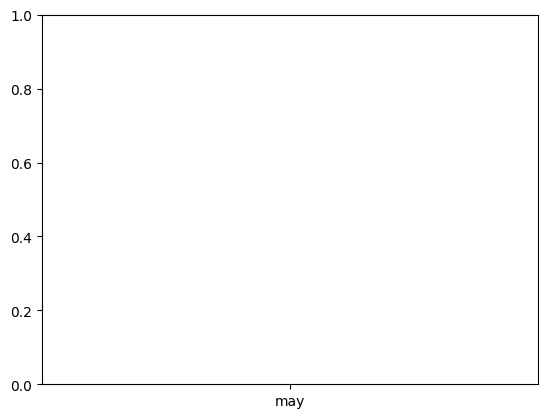

In [26]:
sns.histplot(x=df['month'], y=df['y'].value_counts()[])

In [20]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
sns.pairplot(data=penguins, hue="species");

# EDA

Feature identification and their data types
* Structure Investigation
* Structure of non-numerical features
* Structure of numerical features

Statistical characteristics of the features
* Quality Investigation
* Duplicates
* Missing values

Unwanted entries and recording errors
* Content Investigation
* Feature distribution
* Feature patterns
* Feature relationships

- Validated if your data is balanced — are different groups represented in your data? Are there enough examples of each class you wish to predict?
- Is there bias in your data — are subgroups in your data treated more favorable than others?

визначити метрики якості результатів моделі

обрати і реалізувати метод валідації

натренувати модель з оптимальними гіперпараметрами

порахувати тренувальні, валідаційні і тестові метрики

зробити висновки з коротким описом, чому обрали саме ту чи іншу модель,
метрики, проаналізувати, як вдалося покращити результати протягом валідації